# Automated Image Registration

In [4]:
%matplotlib notebook
import image_registration as ir
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.ndimage.filters import gaussian_filter
import os

In [5]:
cd "~\Google Drive\MAGPIE\data\2015\s1214_15 C Reconnection 12 Frame\s1214_15"

/Users/jdhare/Google Drive/MAGPIE/data/2015/s1214_15 C Reconnection 12 Frame/s1214_15


In [3]:
fn="s0821_15 Background_"
b=[]
for i in range(1,13):
    if i<10:
        s="0"+str(i)
    else:
        s=str(i)
    im=plt.imread(fn+"0"+s+".jpg")
    b.append(np.asarray(np.sum(im,2), dtype=float))
    

fixed_im=2    
norm=b[fixed_im].sum()

for i in range(0,12):
    bb=b[i]
    n=bb.sum()/norm
    bb=bb/n
    bb=bb/bb.max()
    b[i]=gaussian_filter(bb, 0.1, mode='nearest')#np.clip(b, a_min=0.0, a_max=0.8)

FileNotFoundError: [Errno 2] No such file or directory: 's0821_15 Background_001.jpg'

In [6]:
shot=os.path.split(os.getcwd())[-1][0:8] #automatically grab the shot number
b=[]
s=[]
for i in range(1,13):
    if i<10:
        st="0"+str(i)
    else:
        st=str(i)
    try:
        bk_fn=shot+" Background/"+shot+" Backgrounds_0"+st+".jpg"
        bk_im=plt.imread(bk_fn) #read background image
        bk_im=np.asarray(np.sum(bk_im,2), dtype=float)
    except FileNotFoundError:
        bk_fn=shot+" Background/"+shot+" Backgrounds_0"+st+".tif"
        bk_im=plt.imread(bk_fn) #read background image
        bk_im=np.asarray(bk_im,dtype=float)
    b.append(bk_im)#np.asarray(np.sum(bk_im,2), dtype=float)) #convert to grrayscale
    sh_fn=shot+" Shot/"+shot+" Shot_0"+st+".tif" 
    sh_im=plt.imread(sh_fn)
    sh_im=np.asarray(sh_im,dtype=float)
    s.append(sh_im)

bb=np.zeros((13, b[0].shape[0], b[0].shape[1])) #create an empty array to store the results
ss=np.zeros((13, s[0].shape[0], s[0].shape[1]))
bb[0]=b[0]
ss[0]=s[0]
shifts=np.zeros((13,2))

In [ ]:
sT=[]
for i in range(0,12):
    st, scale, angle, (t0,t1)=ir.similarity(s[0], s[i])
    sT.append(st)
    print(i, scale, angle, t0, t1)

0 1.0 0.0 0 0
1 1.0 0.0 -2 -4
2 1.0 0.0 157 46
3 1.0 0.0 123 379
4

In [8]:
S0=np.fft.fft2(s[0])
r=[]
for si in s: 
    S=np.fft.fft2(si)
    R=S0*np.conj(S)/np.abs(S0*np.conj(S))
    rr=np.fft.ifft2(R)
    r.append(rr)
    print(np.unravel_index(rr.argmax(), rr.shape))

(0, 0)
(2, 4)
(817, 1036)
(851, 703)
(805, 39)
(866, 461)
(590, 410)
(721, 16)
(699, 364)
(840, 724)
(816, 226)
(622, 27)


In [11]:
B0=np.fft.fft2(b[0])
r=[]
for bi in b: 
    B=np.fft.fft2(bi)
    R=B0*np.conj(B)/np.abs(B0*np.conj(B))
    rr=np.fft.ifft2(R)
    r.append(rr)
    print(np.unravel_index(rr.argmax(), rr.shape))

(0, 0)
(0, 10)
(6, 9)
(783, 387)
(2, 8)
(859, 8)
(789, 668)
(0, 0)
(0, 13)
(859, 8)
(719, 299)
(0, 10)


In [12]:
bp=sp.ndimage.shift(b[0], [10.1,20.3])
B=np.fft.fft2(bp)
R=B0*np.conj(B)/np.abs(B0*np.conj(B))
r=np.fft.ifft2(R)
print(np.unravel_index(r.argmax(), r.shape))

(850, 980)


In [18]:
bp.shape

(860, 1000)

<IPython.core.display.Javascript object>


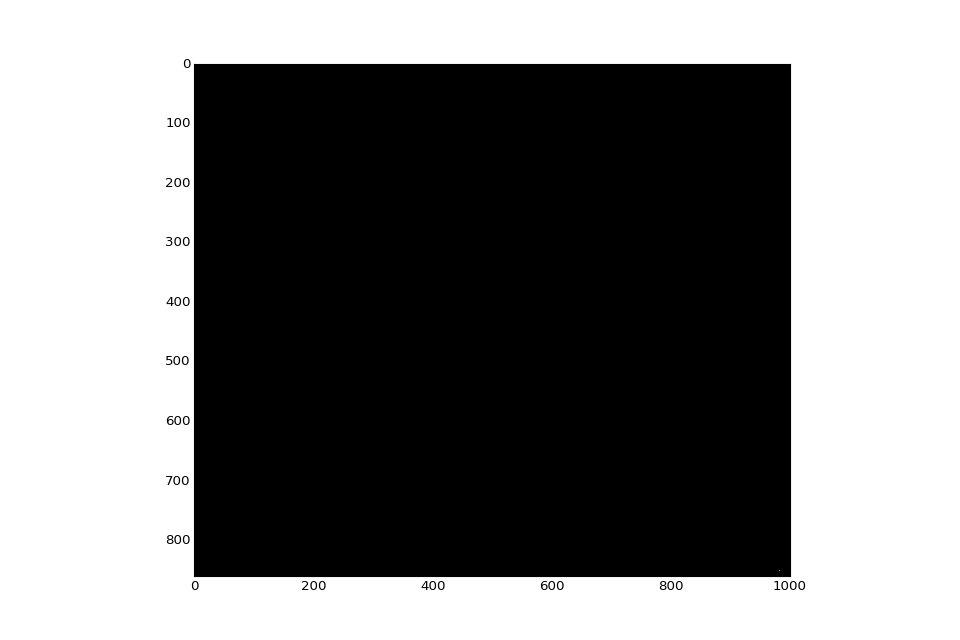

In [19]:
fig, ax=plt.subplots( figsize=(12,8))
ax.imshow(np.abs(r), cmap='gray')

In [31]:
fn="s0821_15 Background_"
B=[]
for i in range(1,13):
    if i<10:
        s="0"+str(i)
    else:
        s=str(i)
    im=plt.imread(fn+"0"+s+".jpg")
    B.append(np.asarray(np.sum(im,2), dtype=float))

fixed_im=2    
norm=B[fixed_im].sum()

for i in range(0,12):
    b=B[i]
    n=b.sum()/norm
    b=b/n
    b=b/b.max()
    B[i]=b#gaussian_filter(b, 4, mode='nearest')#np.clip(b, a_min=0.0, a_max=0.8)

In [42]:
BT=[]
no_shift=[]
for i in range(0,12):
    Bt, scale, angle, (t0,t1)=ir.similarity(B[fixed_im], B[i])
    BT.append(Bt)
    if t1+t0 is 0 and fixed_im is not i:
        no_shift.append[i]
    print(i, scale, angle, t0, t1)

0 1.0 0.0 6 9
1 1.0 0.0 2 -1
2 1.0 0.0 0 0
3 1.0 0.0 0 2
4 1.0 0.0 0 0
5 1.0 0.0 0 0
6 1.0 0.0 0 8
7 1.0 0.0 1 0
8 1.0 0.0 2 0
9 1.0 0.0 5 0
10 1.0 0.0 0 -2
11 1.0 0.0 2 0


0.002957770682


<IPython.core.display.Javascript object>


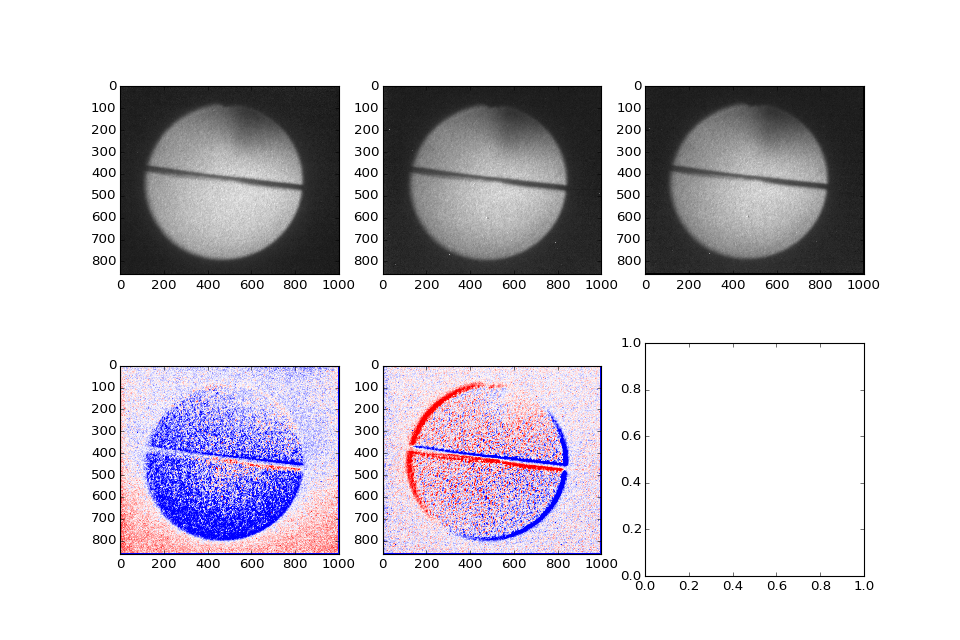

In [44]:
im=0
diff=BT[im]-B[fixed_im]
shift=BT[im]-B[im]
print((diff**2).mean(),(B[fixed_im]**2).mean())
fig, ax=plt.subplots(2,3, figsize=(12,8))
ax[0,0].imshow(B[fixed_im], cmap='gray', clim=[0,1])
ax[0,1].imshow(B[im], cmap='gray', clim=[0,1])
ax[0,2].imshow(BT[im], cmap='gray', clim=[0,1])
ax[1,0].imshow(diff, cmap=plt.cm.bwr, clim=[-0.1,0.1])
ax[1,1].imshow(shift, cmap=plt.cm.bwr, clim=[-0.1,0.1])

In [36]:
zeros=[]
for j in range(0,12):
    zero_count=0
    for i in range(0,12):
        Bt, scale, angle, (t0,t1)=ir.similarity(B[j], B[i])
        if t0+t1 is 0:
            zero_count+=1
    zeros.append(zero_count)  

In [41]:
0+0 is 0 and 2 is not 2

False

<IPython.core.display.Javascript object>


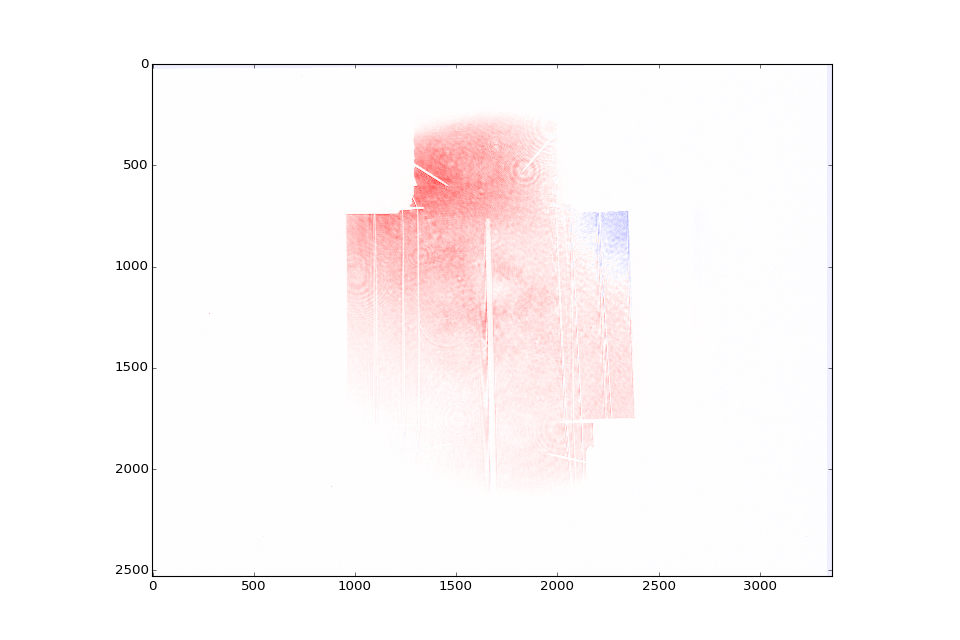

In [34]:
fig, ax=plt.subplots(figsize=(12,8))
ax.imshow(IR_check, cmap=plt.cm.bwr,clim=[-0.1,0.1])

C:\Users\jdavies\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: divide by zero encountered in divide
  from ipykernel import kernelapp as app
C:\Users\jdavies\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in divide
  from ipykernel import kernelapp as app


<IPython.core.display.Javascript object>


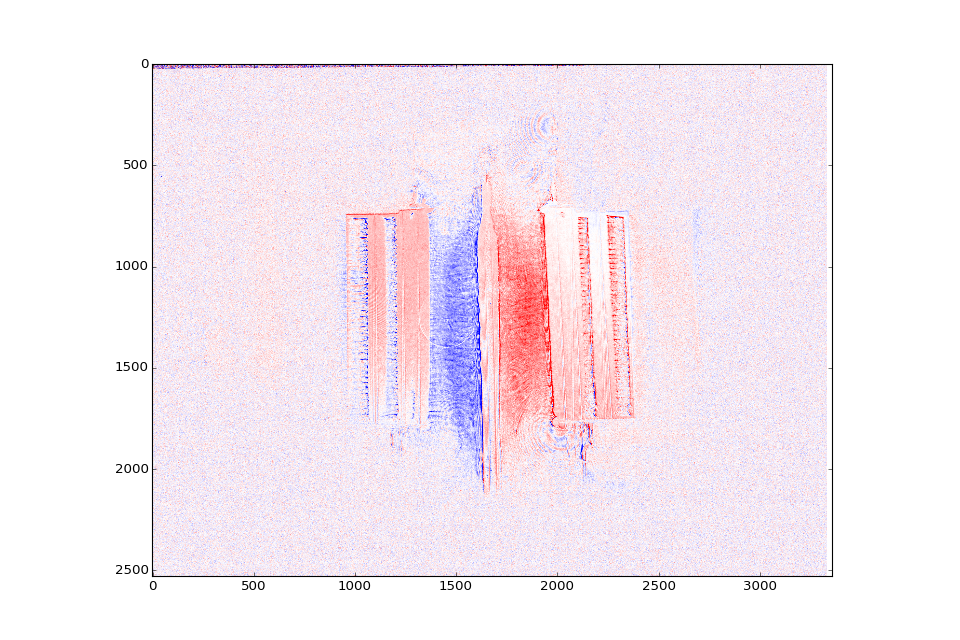

In [30]:
N0=S0/B0
N1=ST/BT
diff=N0-N1
#cmap=plt.cm.bwr,
fig, ax=plt.subplots(figsize=(12,8))
ax.imshow(diff, cmap=plt.cm.bwr,clim=[-1,1])

In [31]:
beta=3*np.pi/180
alpha=0.5*np.arcsin(diff*np.tan(beta))
alpha=alpha*180/np.pi
alpha=np.nan_to_num(alpha)

C:\Users\jdavies\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:2: RuntimeWarning: invalid value encountered in arcsin
  from ipykernel import kernelapp as app


<IPython.core.display.Javascript object>


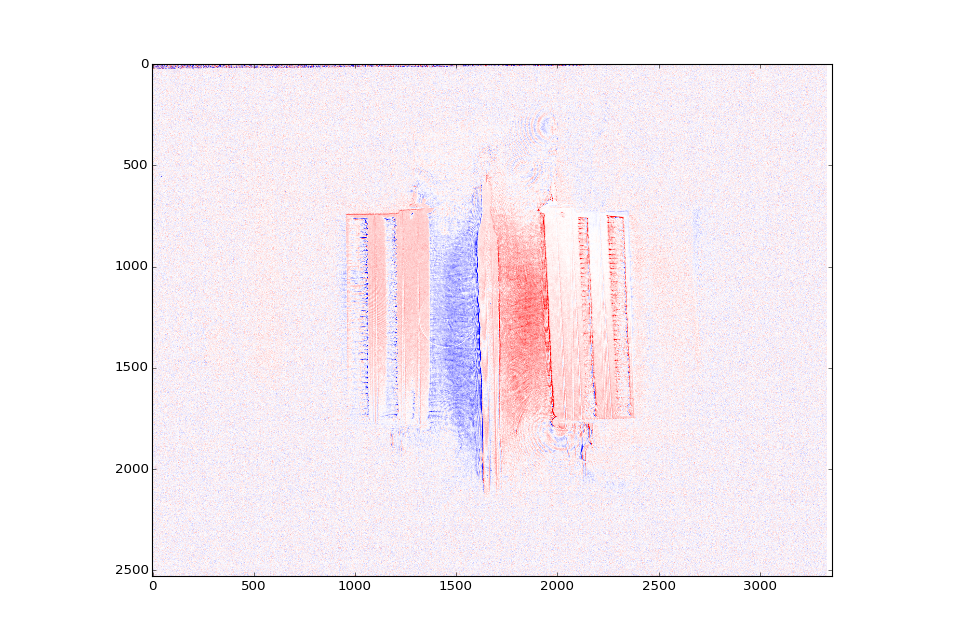

In [91]:
fig, ax=plt.subplots(figsize=(12,8))
ax.imshow(alpha, cmap=plt.cm.bwr,clim=[-2,2])

In [143]:
t1

-124

In [10]:
I1=np.genfromtxt("s0", delimiter=',')

In [11]:
I1=np.nan_to_num(I1)
I1=I1-I1.min()
I1=np.fliplr(I1)
I1r=sp.ndimage.interpolation.zoom(I1, zoom=resize)
I1rc=I1r[:,crop/2:-crop/2]

In [12]:
IT, I1T, scale, angle, (t0, t1)=ir.transform_like(B0,I0n, I1rc)

<IPython.core.display.Javascript object>


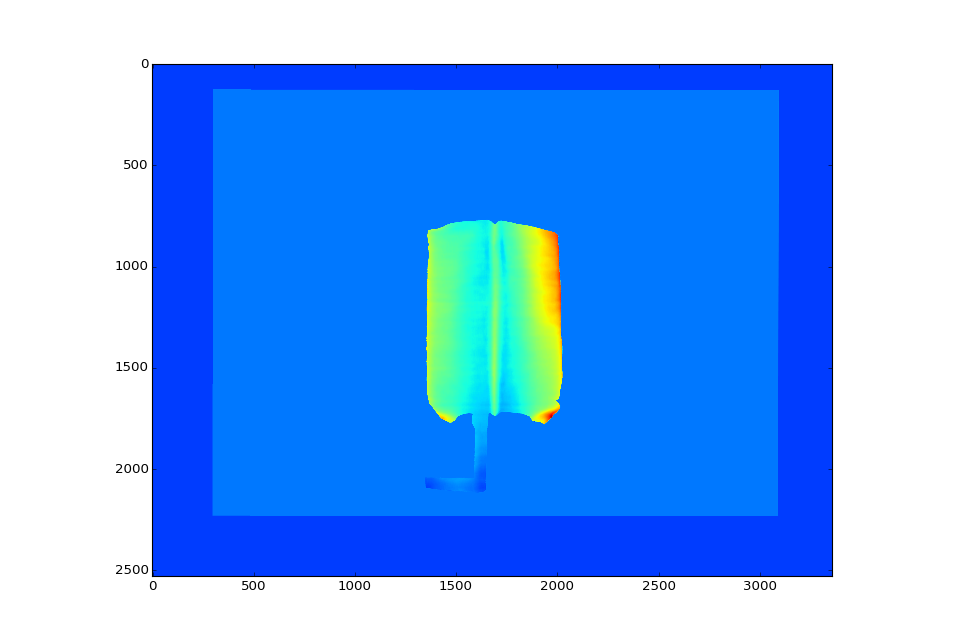

In [13]:
fig, ax=plt.subplots(figsize=(12,8))
ax.imshow(I1T)

In [14]:
alpha=np.nan_to_num(alpha)
neL=np.ma.masked_less(I1T, 5e16)
B=5.99e18*alpha/neL

C:\Users\jdavies\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: divide by zero encountered in divide
  app.launch_new_instance()
C:\Users\jdavies\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: overflow encountered in divide
  app.launch_new_instance()
C:\Users\jdavies\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:3: RuntimeWarning: invalid value encountered in divide
  app.launch_new_instance()


<IPython.core.display.Javascript object>


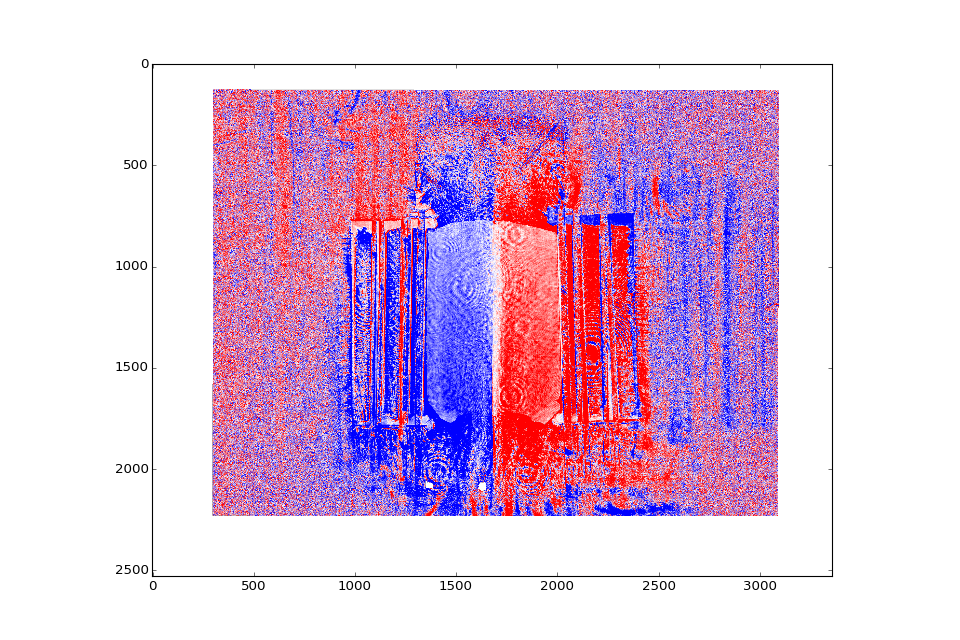

In [15]:
fig, ax=plt.subplots(figsize=(12,8))
ax.imshow(B,cmap=plt.cm.bwr,clim=[-10,10])

<IPython.core.display.Javascript object>


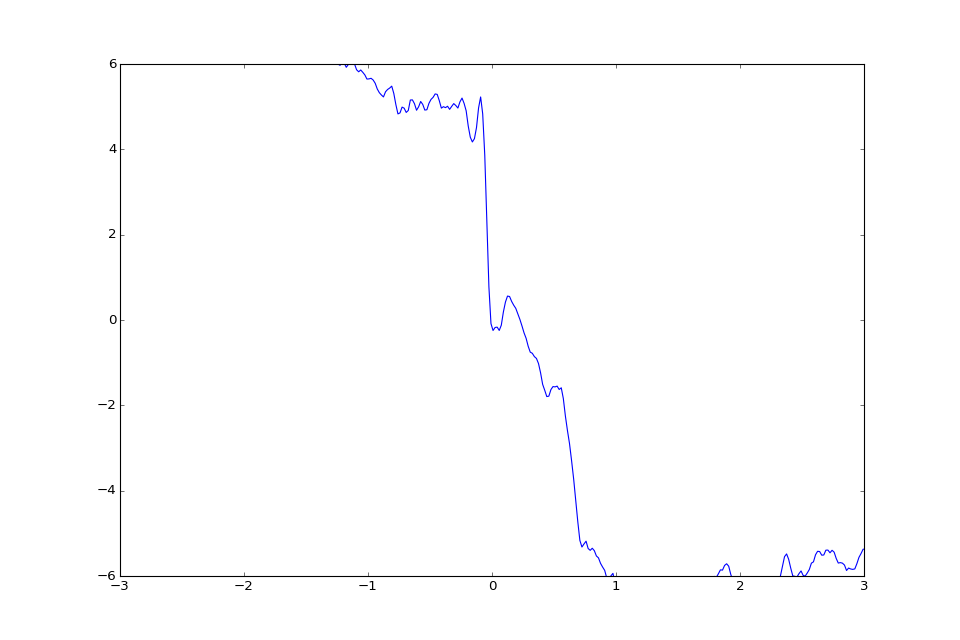

(-6, 6)

In [16]:
centre=1678
scale=60.0
y_mm=np.linspace(-centre, B.shape[1]-centre, B.shape[1])/scale
Bdz=B[850:1700,:].mean(0)
Bdz=Bdz-Bdz.mean()
fig,ax=plt.subplots(figsize=(12,8))
ax.plot(y_mm,-Bdz)
ax.set_xlim(-3,3)
ax.set_ylim(-6,6)

# Harris Layer

<IPython.core.display.Javascript object>


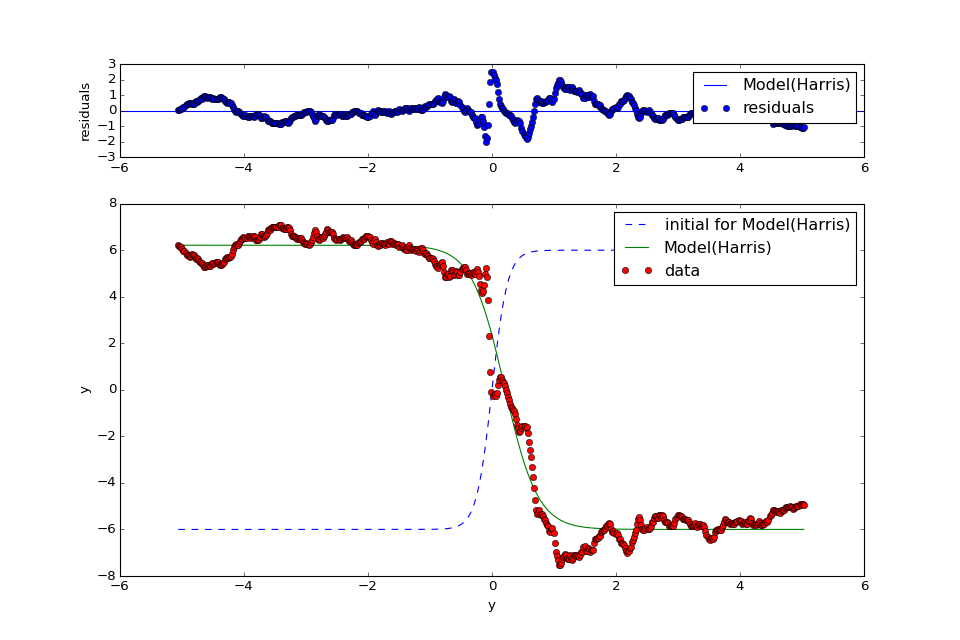

[[Model]]
    Model(Harris)
[[Fit Statistics]]
    # function evals   = 61
    # data points      = 606
    # variables        = 4
    chi-square         = 268.473
    reduced chi-square = 0.446
[[Variables]]
    y0:   0.20408091 +/- 0.009717 (4.76%) (init= 0)
    C:    0.10727670 +/- 0.029604 (27.60%) (init= 0)
    B0:  -6.10600587 +/- 0.030911 (0.51%) (init= 6)
    L:    0.53144063 +/- 0.016902 (3.18%) (init= 0.25)
[[Correlations]] (unreported correlations are <  0.100)
    C(y0, C)                     = -0.398 
    C(B0, L)                     = -0.370 


In [144]:
B=Bdz[1374:1980]
y=y_mm[1374:1980]
from lmfit import Model
def Harris(y, y0, B0, L,C):
    return B0*np.tanh((y-y0)/L)+C
hm=Model(Harris, independent_vars='y')
hm.set_param_hint('B0', value = 6.0)
hm.set_param_hint('y0', value = 0)
hm.set_param_hint('L', value = 0.25)
hm.set_param_hint('C', value = 0)
res=hm.fit(-B, y=y)
L_fit=res.best_values['L']
B0_fit=res.best_values['B0']
res.plot(fig_kws={'figsize':(12,8)})
print res.fit_report()

# Comparison to previous Data

In [18]:
ang=np.loadtxt("Data/s0513_15 faraday_angle.txt", delimiter=',')

<IPython.core.display.Javascript object>


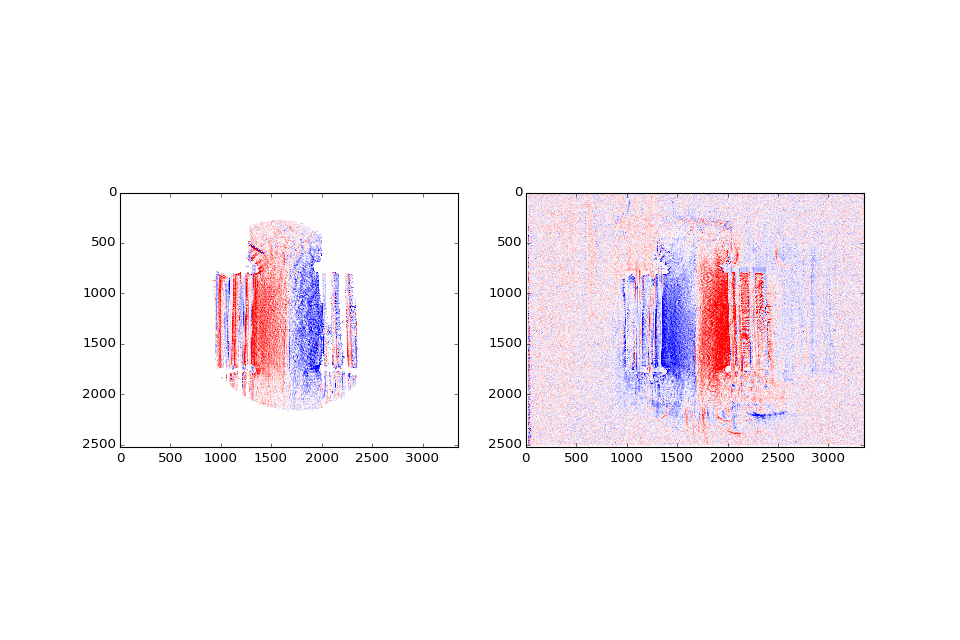

In [19]:
fig, ax=plt.subplots(1,2,figsize=(12,8))
ax[0].imshow(ang,cmap=plt.cm.bwr,clim=[-1,1])
ax[1].imshow(alpha,cmap=plt.cm.bwr,clim=[-1,1])

<IPython.core.display.Javascript object>


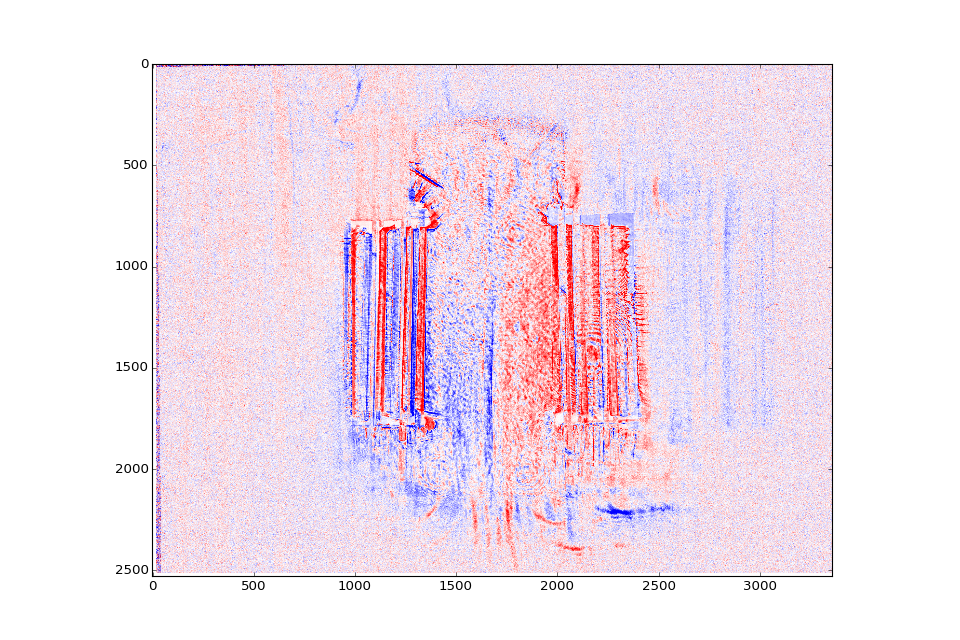

In [20]:
fig, ax=plt.subplots(figsize=(12,8))
ax.imshow(ang+alpha,cmap=plt.cm.bwr,clim=[-1,1])